<a href="https://colab.research.google.com/github/pranjalko/ML-Assignments/blob/main/KNN%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q.1
#(a)
import pandas as pd
from pandas import *
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv("diabetes (1).csv",encoding='windows-1252')

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Q.1
#(b)



df = pd.read_csv("diabetes (1).csv",encoding='windows-1252')
#reducing noise
mean = df['Insulin'].mean()
std = df['Insulin'].std()

df_new = df[df.Insulin <= mean + 2*std]
df_new = df[df.Insulin >= mean - 2*std]


In [ ]:
#removing null values
df = df.dropna()

In [ ]:
for column in df:
  df[column]=df[column]/df[column].max()

df.head()

#normalizing between 0 and 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1.0


In [ ]:
#(c)

X = df.drop(['Outcome'],axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.2, random_state=7)

In [ ]:
#Q.2
#(a)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy -->", accuracy*100)

Accuracy --> 70.12987012987013


In [ ]:
#(b)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
for i in range(4,11):
  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_pred, y_test)
  print(f"Accuracy --> k =  ({i})", accuracy*100)

Accuracy --> k =  (4) 70.12987012987013
Accuracy --> k =  (5) 71.42857142857143
Accuracy --> k =  (6) 70.77922077922078
Accuracy --> k =  (7) 74.02597402597402
Accuracy --> k =  (8) 73.37662337662337
Accuracy --> k =  (9) 74.02597402597402
Accuracy --> k =  (10) 74.02597402597402


In [ ]:
#(c)


X = df.iloc[:,:-1]

y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=7)
X_trainA = X_train.to_numpy()
X_testA = X_test.to_numpy()
y_trainA = y_train.to_numpy()
y_testA = y_test.to_numpy()


#print(X_test.iloc[0])
print('                ')
print('dataframe fram inside function')
print('             ----           ')



# Test the function



def knn_scratch(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_testA:
        distances = []

        for train_point in X_trainA:
            distance = np.linalg.norm(test_point - train_point)
            
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_scratch(X_train, X_test, y_train, y_test, k=5, p=1)

from sklearn.metrics import accuracy_score

print("Accuracy -->",accuracy_score(y_test, y_hat_test)*100)

                
dataframe fram inside function
             ----           
Accuracy --> 73.37662337662337


In [ ]:
#Q3
#(a)
df1 = df.drop(['Outcome'], axis = 1)
dict = {}
for column in df1:
  dict[column] = df1[column].std()

my_keys = sorted(dict, key=dict.get, reverse=True)[:2]
df_new = df[my_keys]
df_new['Outcome'] = df['Outcome']
df_new.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Pregnancies,SkinThickness,Outcome
0,0.352941,0.353535,1.0
1,0.058824,0.292929,0.0
2,0.470588,0.000000,1.0
3,0.058824,0.232323,0.0
4,0.000000,0.353535,1.0


In [ ]:
#(b)

X = df_new['Pregnancies']
X = X.to_numpy()
X = X.reshape(-1,1)

y = df_new['Outcome']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 , test_size=0.2)

from sklearn.preprocessing import KBinsDiscretizer
bin_disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_train_transformed = bin_disc.fit_transform(X_train)
X_train_transformed = np.array([X_train_transformed]).reshape((-1,1))
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train_transformed,y_train)

print(model.score(X_test,y_test))

# Repeating the same w.r.t other column

X2 = df_new['SkinThickness'] 
y2 = df_new['Outcome']
X2 = X2.to_numpy()
X2 = X2.reshape(-1,1)

0.6168831168831169


In [ ]:
from sklearn.model_selection import train_test_split
X2_train , X2_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

model.fit(X2_train,y_train)

GaussianNB()

In [ ]:
print(model.score(X2_test,y_test))

0.7272727272727273


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01355cb450>,
      dtype=object)

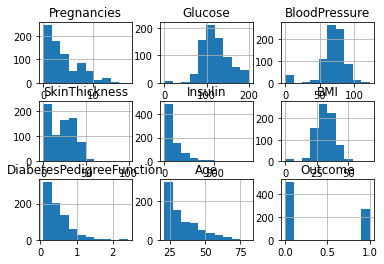

In [ ]:
df_new.hist()